In [1]:
from selenium import webdriver

### Selenium
- https://www.seleniumhq.org/
- 기본 사용법
- 파일 업로드 다운로드
    - google vision api 웹페이지에서 실습
- 스크래핑
    - gmarket 베스트 셀러 200 아이템 정보 수집
    - 네이버 메일(본인계정) 데이터 수집
- 자동화
    - 워드프레스 블로그에 자동으로 댓글을 작성
- 이미지 스크린샷
    - youtube 페이지로 실습
    - pillow : python 이미지 처리 패키지

#### 기본 사용법

In [2]:
# 브라우져 열기
# driver - 브라우져 객체
driver = webdriver.Chrome()

In [2]:
# 페이지 이동
driver.get("http://naver.com")

In [3]:
# 브라우져의 윈도우 사이즈 조절
driver.set_window_size(800, 600) # (가로, 세로)

In [4]:
# 스크롤 조절
scirpt = "window.scrollTo(500,300);" #(가로, 세로)
driver.execute_script(scirpt)

In [5]:
# 현재 보여지는 윈도우창 객체를 저장
main_window = driver.current_window_handle
main_window

'CDwindow-A9AF507B169904EF1E1630C806129043'

In [6]:
# 새로운 윈도우 탭 열기
script = "window.open('http://google.com');"
driver.execute_script(script)

In [11]:
#현재 보여지는 윈도우 창이 저장되는 곳
driver.current_window_handle

'CDwindow-A9AF507B169904EF1E1630C806129043'

In [9]:
# 윈도우 탭 객체 확인
windows = driver.window_handles
windows

['CDwindow-A9AF507B169904EF1E1630C806129043',
 'CDwindow-9C44FDBE651DB381EA9EAAB61686088B']

In [12]:
# 현재 윈도우 탭 설정
driver.switch_to_window(windows[1])

In [13]:
driver.switch_to_window(main_window)

In [14]:
# 페이지 새로고침
script = "location.reload();"
driver.execute_script(script)

In [15]:
# alert
script = "alert('data science');"
driver.execute_script(script)

In [18]:
alert = driver.switch_to_alert()
alert.text

'data science'

In [19]:
alert.accept()

In [20]:
# confirm
script = "confirm('test selenium');"
driver.execute_script(script)

In [21]:
confirm = driver.switch_to_alert()
confirm.text

'test selenium'

In [22]:
confirm.dismiss() # 취소 버튼 클릭
# confirm.accept() # 확인 버튼 클릭

In [23]:
# input 엘리먼트에 문자열 입력하기
driver.find_element_by_css_selector("#query")\
.send_keys("패스트 캠퍼스")

In [24]:
# 검색 버튼 클릭
driver.find_element_by_css_selector("#search_btn")\
.click()

In [6]:
# 현재 윈도우 창만 닫기
driver.close()

In [27]:
# 브라우져 닫기
driver.quit()

#### 파일 업로드
- google vision api 페이지
- vision api 페이로 이동
- iframe으로 frame을 수정
- 이미지 파일을 업로드
- 웹데이터와 도큐먼트 데이터를 수집

In [2]:
# 구글 비전 api 페이지 이동
url = "https://cloud.google.com/vision/"
driver = webdriver.Chrome()
driver.get(url)

In [29]:
# iframe 영역으로 frame 변경
iframe = driver.find_element_by_css_selector\
("#vision_demo_section > iframe")
driver.switch_to_frame(iframe)

In [34]:
# 메인프레임으로 변경
# driver.switch_to_default_content()

In [32]:
# 파일업로드
# 파일 경로를 쓸때는 절대경로로 사용해야 합니다.
# /, \\
file_path = "C:/Users/Home/Documents/dev/TIL/programming/self_study_summary/dog.png"
driver.find_element_by_css_selector("#input")\
.send_keys(file_path)

In [33]:
# 웹데이터 가져오기
driver.find_element_by_css_selector("#webDetection")\
.click()

In [40]:
results = driver.find_elements_by_css_selector\
("#card .container > .row")[:15] # css로만 구성한 ".container > .row"도 동일한 결과가 나옴
for result in results:
    print(
    result.find_element_by_css_selector('.name').text,
    result.find_element_by_css_selector('.score').text
    )

French Bulldog 1.29047
Boston Terrier 1.28066
Bulldog 1.27885
Bull Terrier 1.07139
Soft-coated Wheaten Terrier 0.98682
Puppy 0.8898
Border Collie 0.78608
Terrier 0.6546
Pet 0.6301
Brindle 0.5639
Dog breed 0.4977
Breed 0.4297
Veterinarian 0.4175
Black Brindle 0.4112
Dog 0


In [35]:
# 문자열 데이터 가져오기
driver.find_element_by_css_selector("#fullTextAnnotation").click()

In [44]:
fieldsets = driver.find_elements_by_css_selector\
(".page > .container.style-scope.vs-document > fieldset")
len(fieldsets)

2

In [49]:
documents = [] # 문장 2개가 들어갑니다.

for fieldset in fieldsets:
    words = fieldset.find_elements_by_css_selector\
    (".container .word")
    word_list = []
    for word in words:
        word = word.text.replace(" ","").replace("'","")
        word_list.append(word)
    documents.append(" ".join(word_list))

documents

['In the dog house', ' 인기를 잃다 , 면목을 잃다']

In [3]:
driver.quit()

#### 스크래핑
- gmarke 베스트 200 데이터 수집
- http://corners.gmarket.co.kr/Bestsellers

In [4]:
url = "http://corners.gmarket.co.kr/Bestsellers"
driver = webdriver.Chrome() 
driver.get(url)

In [5]:
items = driver.find_elements_by_css_selector(".best-list:nth-child(3) > ul > li")
len(items)

200

In [66]:

dict_list = []

for item in items:
    dict_list.append({
        "title" : item.find_element_by_css_selector(".itemname").text,
        "link" : item.find_element_by_css_selector(".itemname").get_attribute("href"),
        "o-price": item.find_element_by_css_selector(".o-price")\
        .text.replace(",","")[:-1],
        "s-price": item.find_element_by_css_selector(".s-price")\
        .text.split(" ")[0].replace(",","")[:-1],
    })
    
df = pd.DataFrame(dict_list)
df

,link,o-price,s-price,title
0,http://item.gmarket.co.kr/Item?goodscode=62724...,19500,5900,더다다/원피스형 롱티/신상/루즈/박시/빅사이즈
1,http://item.gmarket.co.kr/Item?goodscode=14301...,39000,28470,[아디다스]니짜 CQ2332외 4종 택1 G/ 아디다스
2,http://item.gmarket.co.kr/Item?goodscode=63617...,30000,12900,[동원샘물미네마인]동원 샘물 2Lx9병x3팩(총 27병) /생수
3,http://item.gmarket.co.kr/Item?goodscode=41037...,24000,4900,[아망떼]1+1여름베개커버/인견/순면/30x50/40x60/50x70
4,http://item.gmarket.co.kr/Item?goodscode=14365...,39900,32900,[하기스]2018년형 에어솔솔 썸머 팬티 / 밴드 기저귀 2팩
5,http://item.gmarket.co.kr/Item?goodscode=13005...,20000,12900,[하림]하림 프로라인 치킨너겟 1kg 2봉+치킨너겟 100g(증정)
6,http://item.gmarket.co.kr/Item?goodscode=87359...,30000,13900,[동원덴마크우유]동원 인포켓치즈 20g x20개+(저키x8개 or 치즈디퍼즈)
7,http://item.gmarket.co.kr/Item?goodscode=86949...,29600,8900,유스타일팜 여름신상/빅사이즈/밴딩/데님/스커트
8,http://item.gmarket.co.kr/Item?goodscode=91202...,27100,16900,CJ 햇반210gx24개/오뚜기밥24개/컵밥10개/컵반
9,http://item.gmarket.co.kr/Item?goodscode=14298...,29000,14900,나이키 스우시 라운드 반팔 티셔츠


In [73]:
# 비어있는 o-price에 s-price 값을 대입
is_nodata = df["o-price"] == ""
df["o-price"][is_nodata] = df["s-price"][is_nodata]

In [74]:
df

,link,o-price,s-price,title
0,http://item.gmarket.co.kr/Item?goodscode=62724...,19500,5900,더다다/원피스형 롱티/신상/루즈/박시/빅사이즈
1,http://item.gmarket.co.kr/Item?goodscode=14301...,39000,28470,[아디다스]니짜 CQ2332외 4종 택1 G/ 아디다스
2,http://item.gmarket.co.kr/Item?goodscode=63617...,30000,12900,[동원샘물미네마인]동원 샘물 2Lx9병x3팩(총 27병) /생수
3,http://item.gmarket.co.kr/Item?goodscode=41037...,24000,4900,[아망떼]1+1여름베개커버/인견/순면/30x50/40x60/50x70
4,http://item.gmarket.co.kr/Item?goodscode=14365...,39900,32900,[하기스]2018년형 에어솔솔 썸머 팬티 / 밴드 기저귀 2팩
5,http://item.gmarket.co.kr/Item?goodscode=13005...,20000,12900,[하림]하림 프로라인 치킨너겟 1kg 2봉+치킨너겟 100g(증정)
6,http://item.gmarket.co.kr/Item?goodscode=87359...,30000,13900,[동원덴마크우유]동원 인포켓치즈 20g x20개+(저키x8개 or 치즈디퍼즈)
7,http://item.gmarket.co.kr/Item?goodscode=86949...,29600,8900,유스타일팜 여름신상/빅사이즈/밴딩/데님/스커트
8,http://item.gmarket.co.kr/Item?goodscode=91202...,27100,16900,CJ 햇반210gx24개/오뚜기밥24개/컵밥10개/컵반
9,http://item.gmarket.co.kr/Item?goodscode=14298...,29000,14900,나이키 스우시 라운드 반팔 티셔츠


In [85]:
# 할인율 컬럼을 추가 ( 27% )
df["discount_rate"] = \
round((1 - df["s-price"].astype('int') / df["o-price"].astype('int')) * 100, 0)
df["discount_rate"] = df["discount_rate"].astype('int')
df["discount_rate"] = df["discount_rate"].astype('str')
df["discount_rate"] += "%"
df

,link,o-price,s-price,title,discount_rate
0,http://item.gmarket.co.kr/Item?goodscode=62724...,19500,5900,더다다/원피스형 롱티/신상/루즈/박시/빅사이즈,70%
1,http://item.gmarket.co.kr/Item?goodscode=14301...,39000,28470,[아디다스]니짜 CQ2332외 4종 택1 G/ 아디다스,27%
2,http://item.gmarket.co.kr/Item?goodscode=63617...,30000,12900,[동원샘물미네마인]동원 샘물 2Lx9병x3팩(총 27병) /생수,57%
3,http://item.gmarket.co.kr/Item?goodscode=41037...,24000,4900,[아망떼]1+1여름베개커버/인견/순면/30x50/40x60/50x70,80%
4,http://item.gmarket.co.kr/Item?goodscode=14365...,39900,32900,[하기스]2018년형 에어솔솔 썸머 팬티 / 밴드 기저귀 2팩,18%
5,http://item.gmarket.co.kr/Item?goodscode=13005...,20000,12900,[하림]하림 프로라인 치킨너겟 1kg 2봉+치킨너겟 100g(증정),36%
6,http://item.gmarket.co.kr/Item?goodscode=87359...,30000,13900,[동원덴마크우유]동원 인포켓치즈 20g x20개+(저키x8개 or 치즈디퍼즈),54%
7,http://item.gmarket.co.kr/Item?goodscode=86949...,29600,8900,유스타일팜 여름신상/빅사이즈/밴딩/데님/스커트,70%
8,http://item.gmarket.co.kr/Item?goodscode=91202...,27100,16900,CJ 햇반210gx24개/오뚜기밥24개/컵밥10개/컵반,38%
9,http://item.gmarket.co.kr/Item?goodscode=14298...,29000,14900,나이키 스우시 라운드 반팔 티셔츠,49%


#### 네이버 메일 크롤링
- 네이버 페이지로 이동
- 아이디 패스워드를 입력
- 로그인 버튼을 클릭
- 메일 페이지로 이동
- 메일 페이지에서 메일 데이터를 수집

In [86]:
main_url = "http://naver.com"
mail_url = "https://mail.naver.com"

In [87]:
# 네이버 페이지로 이동
driver = webdriver.Chrome()
driver.get(main_url)

In [88]:
# 아이디 패스워드 입력
driver.find_element_by_css_selector("#id").send_keys("1221pdj")
driver.find_element_by_css_selector("#pw").send_keys(pickle.load(open("../test/pw.plk", "rb")))

In [89]:
# 로그인 버튼 클릭
driver.find_element_by_css_selector(".btn_login > input[type=submit]").click()

In [90]:
# 메일 페이지로 이동
driver.get(mail_url)

In [96]:
# 메일 데이터 수집
mails = driver.find_elements_by_css_selector(".mailList > li")
len(mails)

45

In [99]:
for mail in mails:
    name = mail.find_element_by_css_selector(".name > a").text
    title = mail.find_element_by_css_selector(".mail_title").text        

In [100]:
url2 = 'https://mail.naver.com/?n=1529567403918&v=f#{"fClass":"list","oParameter":{"page":"2","sortField":"1","sortType":"0","folderSN":"0","type":"","isUnread":false}}'
driver.get(url2)

In [102]:
mails = driver.find_elements_by_css_selector(".mailList > li")
len(mails)
for mail in mails:
    name = mail.find_element_by_css_selector(".name > a").text
    title = mail.find_element_by_css_selector(".mail_title").text        
    print(name, title)

산업경제리서치 (광고)[보고서] "2018 전세계 무선충전(무선전력전송) 시장전망 및 기술개발 현황"
중고나라 (광고) 다이슨 무선청소기 최저가 런칭
창업신문 (광고) 요즘 뜨고있는 창업아이템. 성공창업을 위한 무점포1인창업과 창업정보 및 다양한 창업아이템 무료시식 및 무료창업설명회
중고나라 (광고) 한용희 주식 전문가가 드리는 상승주 HOT 정보!
히어로 (광고)인터넷교체최대현금50지급하며 휴대폰최신형가장좋은조건으로 도와드립니다
따뜻한 하루 사랑받으며 자란 티
LG전자 (광고) LG gram 밀리언셀러 고마워서 그램! 한정판 그램 이모티콘을 드립니다.
매일유업 [매일다이렉트] 박두진님, 2018년 05월 가정배달 이용 대금 명세서입니다.
중고나라 (광고) 코어i7 레노버 노트북 39만원 (선착순 SSD장착)
산업경제리서치 (광고) [보고서] "미세먼지 분야 국내외 시장 동향 및 분야별 사례분석과 기술개발 현황"
트위터 트위터에서 이외수, 김미화, Wanna One님을 팔로우해보세요!
트위터 이능룡 Lee Neung Ryong 님이 트윗함: 언니네이발관의 이능룡과 못Mot의 이이언이 함께 만든 새로운 팀 'Nig...
창업신문 (광고) 창업, 노후를 위한 준비입니다. 성공창업을 위한 무점포1인창업과 창업정보 및 다양한 창업아이템 무료시식 및 무료창업설명회
트위터 종로구에 있는 사람들이 "The Best Socks in the World Are Finally Available in t...
직업상담사 (광고) [국비지원 무료교육] 국가공인자격 직업상담사 무료 교육 안내 및 자료제공
한국과총 [제5회 국민생활과학기술포럼] 식중독 예방 - 미생물의 바른 이해로부터
히어로 (광고)인터넷교체최대현금50지급하며 휴대폰최신형가장좋은조건으로 도와드립니다
트위터 마녀 님이 트윗함: 이러니 성폭력 가해자들이 “공탁”제도를 악용해 형을 깎는 거죠. 피해자가 “합의”를 원하지 않아도 이따...
트위터 종로구에 있는 사람들이 "‘이혼과정 중 가정폭력 가해 남편에 의한 여성살해 사건’

##### 자동화
- https://radajin661456067.wordpress.com/
- 2개의 계정, 2개의 메시지, 2개의 게시글에 총 8개의 댓글을 자동으로 작성
- 게시물의 링크를 크롤링
- 각 게시물로 가서 댓글을 작성
    - 댓글 작성 레이어을 클릭
    - 댓글 작성
    - 이메일, 이름 추가
    - 댓글 작성 버튼 클릭

In [103]:
# 브라우져 열고 워드프레스 페이지로 이동
url = "https://radajin661456067.wordpress.com/"
driver = webdriver.Chrome()
driver.get(url)

In [105]:
# 게시물 링크 데이터 수집
links = []
articles = driver.find_elements_by_css_selector("#main > article")
for article in articles:
    links.append(
        article.find_element_by_css_selector(".entry-title > a").get_attribute("href")
    )
links

['https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/',
 'https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/']

In [106]:
# 링크 이동
driver.get(links[0])

In [107]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [108]:
# 댓글 작성 영역 클릭
driver.find_element_by_css_selector("#comment-form-comment").click()

In [109]:
# 댓글 작성
driver.find_element_by_css_selector("#comment").send_keys("데사스 8기 B반")

In [110]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);"
driver.execute_script(script)

In [112]:
# 이메일 이름 입력
# email, author
driver.find_element_by_css_selector("#email").clear()
driver.find_element_by_css_selector("#email").send_keys("pdj1224@daum.net")
driver.find_element_by_css_selector("#author").clear()
driver.find_element_by_css_selector("#author").send_keys("asdf")

In [113]:
# 작성버튼을 클릭
driver.find_element_by_css_selector('#comment-submit').click()

In [114]:
import time

def write_comment(driver, link, msg, email, name):
    driver.get(link)
    script = "window.scrollTo(0,10000);"
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#comment-form-comment").click()
    time.sleep(1)
    driver.find_element_by_css_selector("#comment").send_keys(msg)
    script = "window.scrollTo(0,10000);"
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#email").clear()
    driver.find_element_by_css_selector("#email").send_keys(email)
    time.sleep(1)
    driver.find_element_by_css_selector("#author").clear()
    driver.find_element_by_css_selector("#author").send_keys(name)
    time.sleep(1)
    driver.find_element_by_css_selector('#comment-submit').click()

In [117]:
users = [
    {"name":"park1", "email":"pdj1224@daum.net"},
    {"name":"park2", "email":"1221pdj@naver.com"},
]
msgs = ["한국은 3패를 면할수 있을까요?", "아니요"]

for user in users:
    for msg in msgs:
        for link in links:
            print(user["email"], user["name"], msg, end=" - ")
            try:
                write_comment(driver, link, msg, user["email"], user["name"])
                print("성공")
            except:
                print("실패")

pdj1224@daum.net park1 한국은 3패를 면할수 있을까요? - 성공
pdj1224@daum.net park1 한국은 3패를 면할수 있을까요? - 성공
pdj1224@daum.net park1 아니요 - 성공
pdj1224@daum.net park1 아니요 - 성공
1221pdj@naver.com park2 한국은 3패를 면할수 있을까요? - 성공
1221pdj@naver.com park2 한국은 3패를 면할수 있을까요? - 성공
1221pdj@naver.com park2 아니요 - 성공
1221pdj@naver.com park2 아니요 - 성공


In [115]:
links

['https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/',
 'https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/']

#### 이미지 스크린샷
- youtube
- https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s
- windows : `$ pip3 install pillow`
- windows : `$ conda install -c anaconda pillow`

In [1]:
from PIL import Image as pil

In [4]:
import time

# 이미지 스크린샷
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"
driver = webdriver.Chrome()
driver.get(url)
driver.save_screenshot("screenshot.png")

# 여러개의 이미지를 스크린샷
# for idx in range(5):
#     time.sleep(1)
#     driver.save_screenshot("screenshot_" + str(idx) + ".png")

driver.quit()    

(1200, 540)


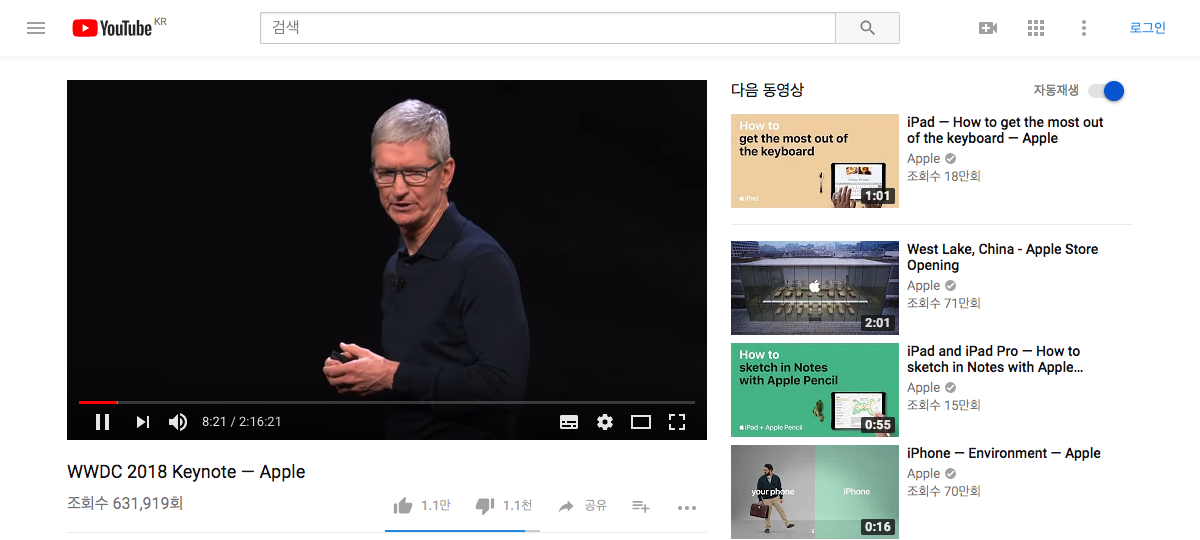

In [5]:
# 이미지 띄우기
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

In [6]:
# id 가 player-container 인 엘리먼트 영역의 위치값을 구하기
driver = webdriver.Chrome()
driver.get(url)

In [26]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 67, 'y': 80}, {'height': 360, 'width': 640})

In [8]:
driver.quit()

In [27]:
# top, bottom, left, right
# 레티나 디스플레이의 경우 *2를 해줘야 합니다.
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']
area = (left, top, right, bottom)
area

(67, 80, 707, 440)

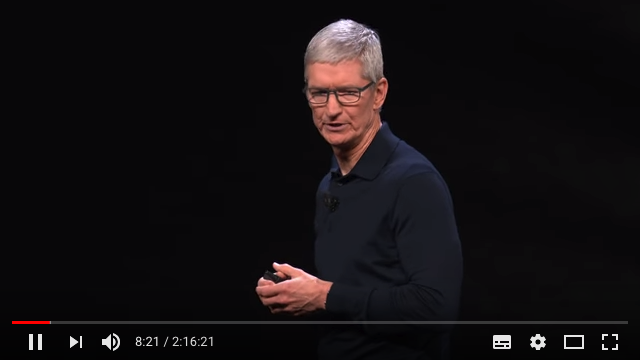

In [28]:
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im

In [14]:
pil_im.save("screenshot_element.png")

In [15]:
# 하단의 재생 기능 영역 자르기
driver = webdriver.Chrome()
driver.get(url)

In [16]:
# height 만 확인
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
location = element.location
size = element.size
location, size

({'x': 79, 'y': 401}, {'height': 39, 'width': 616})

In [ ]:
# 원래 사이즈
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

In [29]:
# top, bottom, left, right
# 레티나 디스플레이의 경우 * 2 를 해줘야 합니다.
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height'] - 39
area = (left, top, right, bottom)
area
# (67, 80, 707, 440)

(67, 80, 707, 401)

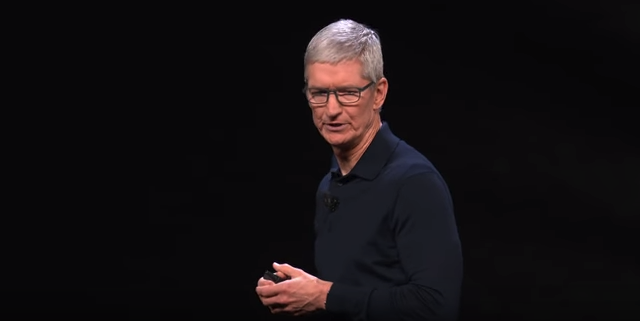

In [31]:
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im

In [32]:
pil_im.save("screenshot_element2.png")